In [58]:
import librosa
from librosa import feature
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
#import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import os
import sys
import time
from functools import reduce
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [ ]:
df_6dB=pd.read_csv(f'C:/Users/regis/OneDrive/Bureaublad/Codit-project-main/Librosa_features_valve_6dB.csv')

## Valve merging of 6,0,-6

In [33]:
def merge_pd(machine):
    df_6dB=pd.read_csv(f'C:/Users/regis/OneDrive/Bureaublad/Codit-project-main/Librosa_features_{machine}_6dB.csv')
    df_0dB=pd.read_csv(f'C:/Users/regis/OneDrive/Bureaublad/Codit-project-main/Librosa_features_{machine}_0dB.csv')
    df_min6dB=pd.read_csv(f'C:/Users/regis/OneDrive/Bureaublad/Codit-project-main/Librosa_features_{machine}_-6dB.csv')
    df_6dB.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
    df_0dB.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
    df_min6dB.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

    df_6dB.columns = [str(col) + '_6dB' for col in df_6dB.columns]
    df_0dB.columns = [str(col) + '_0dB' for col in df_0dB.columns]
    df_min6dB.columns = [str(col) + '_-6dB' for col in df_min6dB.columns]
    data_frames = [df_6dB, df_0dB, df_min6dB]
    df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True, right_index=True,how='outer'), data_frames)
    return df_merged

In [34]:
valve=merge_pd('valve')

In [35]:
valve.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'normal(0)/abnormal(1)_6dB', 'melspectrogram_0dB',
       'melspectrogram_min_0dB', 'melspectrogram_max_0dB',
       'melspectrogram_sum_0dB', 'melspectrogram_corr_0dB',
       'melspectrogram_std_0dB', 'mfcc_0dB', 'rms_0dB',
       'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'normal

In [36]:
valve.drop(columns=['normal(0)/abnormal(1)_6dB','normal(0)/abnormal(1)_0dB'],axis=1,inplace=True)

In [37]:
valve.head()

,melspectrogram_6dB,melspectrogram_min_6dB,melspectrogram_max_6dB,melspectrogram_sum_6dB,melspectrogram_corr_6dB,melspectrogram_std_6dB,mfcc_6dB,rms_6dB,spectral_centroid_6dB,spectral_bandwidth_6dB,...,spectral_flatness _-6dB,spectral_rolloff_-6dB,zero_crossing_rate_-6dB,mean harm_-6dB,mean perc_-6dB,max harm_-6dB,max perc_-6dB,min harm_-6dB,min perc_-6dB,normal(0)/abnormal(1)_-6dB
0,0.006300,6.218734e-10,0.090277,347.580261,0.523183,0.010437,-15.342528,0.002967,1399.372425,1635.526256,...,0.000629,3566.218188,0.098873,-2.914727e-07,-1.149451e-06,0.024765,0.104119,-0.025627,-0.085298,0
1,0.007236,7.803309e-10,0.087623,399.178070,0.461858,0.009354,-14.877153,0.002920,1765.622412,1767.165689,...,0.000419,2937.083941,0.053674,1.012487e-06,2.031724e-06,0.030395,0.076841,-0.030091,-0.060521,0
2,0.006186,6.056689e-10,0.092516,341.284851,0.494020,0.008715,-16.809891,0.002680,1716.821280,1784.159467,...,0.000424,3644.831866,0.084243,-7.028235e-08,-1.127828e-06,0.028087,0.073661,-0.029678,-0.070317,0
3,0.006994,6.636679e-10,0.097133,385.858826,0.489502,0.009895,-15.353941,0.002953,1466.548926,1585.731245,...,0.000294,2854.123654,0.057706,9.979737e-08,7.113005e-07,0.023710,0.068743,-0.026346,-0.062864,0
4,0.005965,5.532336e-10,0.119931,329.072296,0.520290,0.010416,-15.100811,0.002925,1267.393978,1510.835471,...,0.000318,3178.745434,0.074161,-1.004464e-06,-1.443682e-06,0.029470,0.086958,-0.028582,-0.074641,0


In [39]:
valve.rename(columns={'normal(0)/abnormal(1)_-6dB': 'normal(0)/abnormal(1)'}, inplace=True)

In [40]:
valve.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'melspectrogram_0dB', 'melspectrogram_min_0dB',
       'melspectrogram_max_0dB', 'melspectrogram_sum_0dB',
       'melspectrogram_corr_0dB', 'melspectrogram_std_0dB', 'mfcc_0dB',
       'rms_0dB', 'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'melspectrogram_-6dB', 'melspectrogram_min_

In [59]:
y=valve['normal(0)/abnormal(1)'].values
x=valve.drop(columns=['normal(0)/abnormal(1)'], axis=1)

In [60]:
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 3336, Test set:834
Fold:2, Train set: 3336, Test set:834
Fold:3, Train set: 3336, Test set:834
Fold:4, Train set: 3336, Test set:834
Fold:5, Train set: 3336, Test set:834


In [61]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Scores for each fold are: [0.95083933 0.94364508 0.95323741 0.9616307  0.94484412]
Average score: 0.95


In [62]:
y_pred = classifier.predict(xTest)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(yTest, y_pred))
print('classification report')
print(classification_report(yTest, y_pred))
print('accuracy score')
print(accuracy_score(yTest, y_pred))

confusion matrix
[[742   3]
 [ 35  54]]
classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       745
           1       0.95      0.61      0.74        89

    accuracy                           0.95       834
   macro avg       0.95      0.80      0.86       834
weighted avg       0.95      0.95      0.95       834

accuracy score
0.9544364508393285


Feature: 2,	 Name: melspectrogram_max_6dB, 	 Score: 4.97833
Feature: 4,	 Name: melspectrogram_corr_6dB, 	 Score: 4.55280
Feature: 5,	 Name: melspectrogram_std_6dB, 	 Score: 2.18550
Feature: 7,	 Name: rms_6dB, 	 Score: 2.06653
Feature: 17,	 Name: max perc_6dB, 	 Score: 12.66975
Feature: 19,	 Name: min perc_6dB, 	 Score: 6.14789
Feature: 24,	 Name: melspectrogram_corr_0dB, 	 Score: 3.73448
Feature: 37,	 Name: max perc_0dB, 	 Score: 10.73631
Feature: 39,	 Name: min perc_0dB, 	 Score: 6.31211
Feature: 44,	 Name: melspectrogram_corr_-6dB, 	 Score: 3.14127
Feature: 57,	 Name: max perc_-6dB, 	 Score: 6.61771
Feature: 59,	 Name: min perc_-6dB, 	 Score: 4.57862


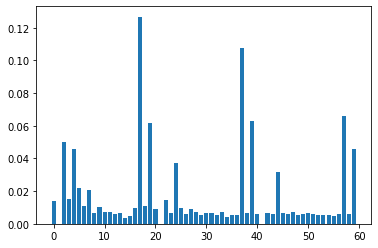

In [66]:
# get importance
unimportant_columns =[]

importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v*100 > 2:
        print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
    if v*100 <= 2:
        unimportant_columns.append(x_columns[i])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
y=valve['normal(0)/abnormal(1)'].values
x=valve.drop(columns=unimportant_columns, axis=1)

In [71]:
x.columns

Index(['melspectrogram_max_6dB', 'melspectrogram_corr_6dB',
       'melspectrogram_std_6dB', 'rms_6dB', 'max perc_6dB', 'min perc_6dB',
       'melspectrogram_corr_0dB', 'max perc_0dB', 'min perc_0dB',
       'melspectrogram_corr_-6dB', 'max perc_-6dB', 'min perc_-6dB',
       'normal(0)/abnormal(1)'],
      dtype='object')

In [67]:
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 3336, Test set:834
Fold:2, Train set: 3336, Test set:834
Fold:3, Train set: 3336, Test set:834
Fold:4, Train set: 3336, Test set:834
Fold:5, Train set: 3336, Test set:834


In [68]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\regis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [69]:
y_pred = classifier.predict(xTest)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(yTest, y_pred))
print('classification report')
print(classification_report(yTest, y_pred))
print('accuracy score')
print(accuracy_score(yTest, y_pred))

confusion matrix
[[742   3]
 [ 35  54]]
classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       745
           1       0.95      0.61      0.74        89

    accuracy                           0.95       834
   macro avg       0.95      0.80      0.86       834
weighted avg       0.95      0.95      0.95       834

accuracy score
0.9544364508393285


In [42]:
#Choosing 80% as training data.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(xTrain, yTrain)
y_pred = classifier.predict(xTest)

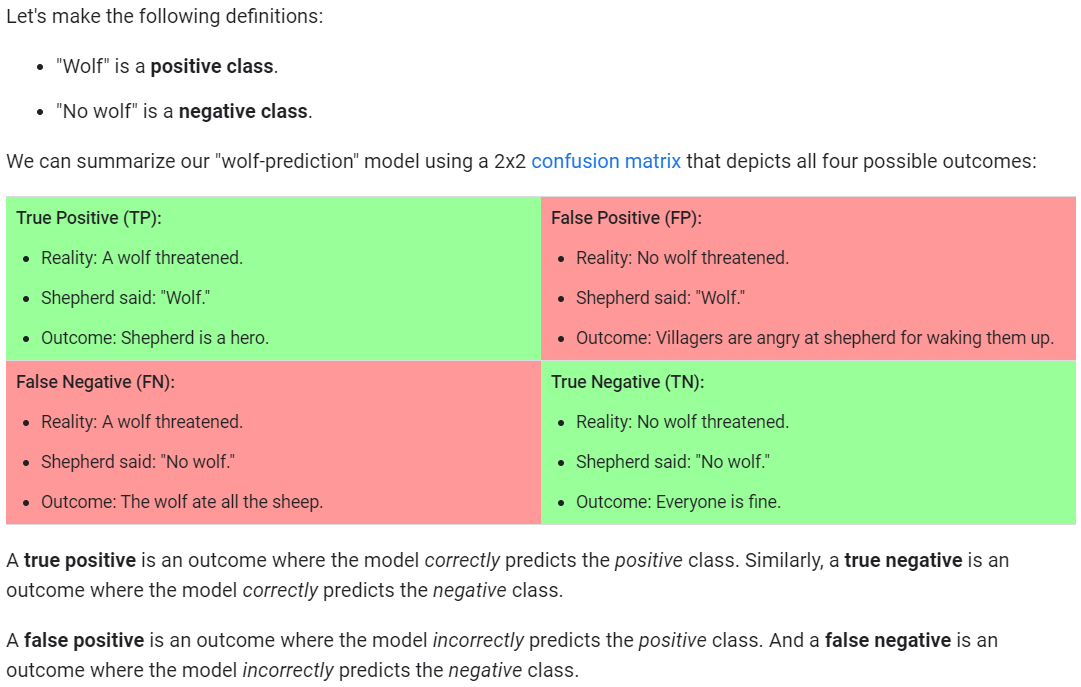

Positive = normal
Negative = abnormal
- TN / True Negative: the case was negative and predicted negative
- TP / True Positive: the case was positive and predicted positive
- FN / False Negative: the case was positive but predicted negative
- FP / False Positive: the case was negative but predicted positive
### Precision — What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.
Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)
### Recall — What percent of the positive cases did you catch?
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)
### F1 score — What percent of positive predictions were correct?
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
### Support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.


### Overfitting
Overfitting is a modeling error that introduces bias to the model because it is too closely related to the data set.
Overfitting makes the model relevant to its data set only, and irrelevant to any other data sets.
Some of the methods used to prevent overfitting include ensembling, data augmentation, data simplification, and cross-validation.

The performance can be measured using the percentage of accuracy observed in both data sets to conclude on the presence of overfitting. If the model performs better on the training set than on the test set, it means that the model is likely overfitting.

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(yTest, y_pred))
print('classification report')
print(classification_report(yTest, y_pred))
print('accuracy score')
print(accuracy_score(yTest, y_pred))

confusion matrix
[[742   3]
 [ 35  54]]
classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       745
           1       0.95      0.61      0.74        89

    accuracy                           0.95       834
   macro avg       0.95      0.80      0.86       834
weighted avg       0.95      0.95      0.95       834

accuracy score
0.9544364508393285


In [46]:
x_columns=list(x.columns)

Feature: 2,	 Name: melspectrogram_max_6dB, 	 Score: 4.97833
Feature: 4,	 Name: melspectrogram_corr_6dB, 	 Score: 4.55280
Feature: 5,	 Name: melspectrogram_std_6dB, 	 Score: 2.18550
Feature: 7,	 Name: rms_6dB, 	 Score: 2.06653
Feature: 17,	 Name: max perc_6dB, 	 Score: 12.66975
Feature: 19,	 Name: min perc_6dB, 	 Score: 6.14789
Feature: 24,	 Name: melspectrogram_corr_0dB, 	 Score: 3.73448
Feature: 37,	 Name: max perc_0dB, 	 Score: 10.73631
Feature: 39,	 Name: min perc_0dB, 	 Score: 6.31211
Feature: 44,	 Name: melspectrogram_corr_-6dB, 	 Score: 3.14127
Feature: 57,	 Name: max perc_-6dB, 	 Score: 6.61771
Feature: 59,	 Name: min perc_-6dB, 	 Score: 4.57862


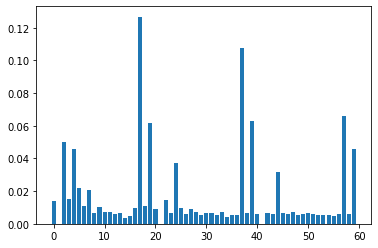

In [48]:
# get importance
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v*100 > 2:
        print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

correlation matrix

# Crossvalidation K-fold

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(x)

In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

## To reuse

In [ ]:
def extract_features(file):

    # check if normal or abnormal
    if 'abnormal' in file:
        operation=1
    else:
        operation=0
    # loading the file, getting y and sr (sample rate)

    y, sr = librosa.load(file)

    # Getting S and phase

    S, phase = librosa.magphase(librosa.stft(y=y))

    # Features for the DataFrame
# chroma features have pitch which is probably not usefull
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr))

    chroma_cqt = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr))

    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr))
# to do
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
    melspectrogram_min = np.min(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
    melspectrogram_max = np.max(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
    melspectrogram_sum = librosa.feature.melspectrogram(y=y, sr=sr, S=S).sum()
    melspectrogram_corr= np.mean(np.corrcoef(librosa.feature.melspectrogram(y=y, sr=sr, S=S)))
    melspectrogram_std= np.std(librosa.feature.melspectrogram(y=y, sr=sr, S=S))
# to check This feature is one of the most important method to extract a feature of an audio signal and is 
#used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal 
#are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral 
#envelope.
    
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr))
#rms when plotted similarities with melspectorgram
#normal rms mean higher than abnormal?
    rms = np.mean(librosa.feature.rms(y=y, S=S))
#spectral centroid computes weighted mean of the frequencies in the sound
#plot is line on melspectogram
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr, S=S))
#Bandwidth(blue zone) is the difference between the upper and lower frequencies in a continuous band of frequencies
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr, S=S))
#needs further investigation, but makes continous data discrete in bins
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr, S=S))
#Spectral flatness (or tonality coefficient) is a measure to quantify how much noise-like a sound is, as opposed to
#being tone-like 1. A high spectral flatness (closer to 1.0) indicates the spectrum is similar to white noise. 
#It is often converted to decibel.
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y, S=S))
#The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at 
#least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and 
#he bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent 
#to a value close to 1 (or 0).
#rolloff with rolloff coefficient 0.01 seems to be the same for (ab)normal
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr, S=S))
#Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram
    poly_features = np.mean(librosa.feature.poly_features(y=y, sr=sr, S=S))
#probably chroma
    tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr))
#normal has higher zero crossing rate?
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=y))
#divide in frequency bands could give more information bout difference normal and abnormal (BPM)
    #tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                       #    hop_length=hop_length)[0]
    # putting them into a dataframe
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    return pd.DataFrame({ 'melspectrogram' : [melspectrogram],'melspectrogram_min':[melspectrogram_min],
                             'melspectrogram_max':[melspectrogram_max], 'melspectrogram_sum':[melspectrogram_sum],
                             'melspectrogram_corr':[melspectrogram_corr] ,'melspectrogram_std':[melspectrogram_std] ,
                             'mfcc' : [mfcc], 'rms' : [rms],
                            'spectral_centroid' : [spectral_centroid], 'spectral_bandwidth' : [spectral_bandwidth],
                            'spectral_contrast' : [spectral_contrast], 'spectral_flatness ' : [spectral_flatness],
                            'spectral_rolloff' : [spectral_rolloff], 
                            'zero_crossing_rate' : [zero_crossing_rate],"mean harm": np.mean(y_harmonic),
                            "mean perc": [np.mean(y_percussive)],"max harm":[np.max(y_harmonic)],"max perc": [np.max(y_percussive)],
                             "min harm":[np.min(y_harmonic)], "min perc":[np.min(y_percussive)], 'normal(0)/abnormal(1)':[operation]})

In [ ]:
def create_df(machine,dB_value):
    # start measuring excecution time
    start_time = time.time()
    #create empty list that will be filled with pathnames
    #find paths normal wav files
    list_normal_6 = []
    num=[0,2,4,6]
    for i in num:
        directory_normal_6 = f"/home/regis/Desktop/Sound Project/files/{machine}/{dB_value}_dB_{machine}/{machine}/id_0{i}/normal/"
        for filename in os.listdir(directory_normal_6):
            file = f"{directory_normal_6}{filename}"
            list_normal_6.append(file)
    list_normal_6.sort()
    #find paths abnormal wav files
    list_abnormal_6 = []
    num=[0,2,4,6]
    for i in num:
        directory_abnormal_6 = f"/home/regis/Desktop/Sound Project/files/{machine}/{dB_value}_dB_{machine}/{machine}/id_0{i}/abnormal/"
        for filename in os.listdir(directory_abnormal_6):
            file = f"{directory_abnormal_6}{filename}"
            list_abnormal_6.append(file)
    list_abnormal_6.sort()
    #add normal to df
    for wav_file in list_normal_6:
        df = extract_features(wav_file)
        if wav_file == list_normal_6[0]:
            df.to_csv(f'Librosa_features_{machine}_{dB_value}dB.csv')
        else:
            df.to_csv(f'Librosa_features_{machine}_{dB_value}dB.csv', mode='a', header=False)
    #add abnormal to df
    for wav_file in list_abnormal_6:
        df = extract_features(wav_file)
        df.to_csv(f'Librosa_features_{machine}_{dB_value}dB.csv', mode='a', header=False) 
    print("--- %s seconds ---" % (time.time() - start_time)